In [151]:
import pandas as pd
import numpy as np
import random
from sklearn.metrics import f1_score, accuracy_score
import matplotlib.pyplot as plt

In [ ]:
bach_cont = pd.read_csv("bachelor-contestants.csv")
ette_cont = pd.read_csv("bachelorette-contestants.csv")

In [142]:
bachelorette = pd.read_csv('bachelorette_forprediction.csv')

In [143]:
ette14 = bachelorette[bachelorette['SEASON'] == 14].copy()

In [144]:
keep_set = ette14[['NAME', 'SEASON','WINNER','TOP_THREE']].copy()
keep_set

,NAME,SEASON,WINNER,TOP_THREE
0,Garrett Yrigoyen,14,1,1
1,Blake Horstmann,14,0,1
2,Jason Tartick,14,0,1
3,Colton Underwood,14,0,0
4,Wills Reid,14,0,0
5,Leo Dottavio,14,0,0
6,Connor Obrochta,14,0,0
7,Lincoln Adim,14,0,0
8,Chris Randone,14,0,0
9,John Graham,14,0,0


In [87]:
#function returns name of random person from input contestant list
def randbaseline(cont_list):
    num_cont = len(cont_list)
    ran_cont_list = random.sample(list(cont_list), len(cont_list)) #shuffles input list
    win_num = random.randint(0,num_cont-1) #set seed??
    return ran_cont_list[win_num]
    

In [136]:
#function returns name of 3 random people from input contestant list
def randbaseline_top3(cont_list):
    num_cont = len(cont_list)
    ran_cont_list = random.sample(list(cont_list), len(cont_list)) #shuffles input list
    win_num = np.random.choice(np.arange(num_cont-1), 3, replace=False)
    return ran_cont_list[win_num[0]],ran_cont_list[win_num[1]],ran_cont_list[win_num[2]]

In [145]:
week = 1
while week <= 8:
# while week <= 10:
#     print('----')
#     print(len(ette14['NAME']))
    pred_week = 'PREDICTED' + str(week)
    
    #for winner prediction
#     keep_set.loc[keep_set['NAME'] == randbaseline(ette14['NAME']), pred_week] = 1
    
    #for top 3 prediction
    top3rand = randbaseline_top3(ette14['NAME'])
    print(top3rand)
    for ea in top3rand:
        keep_set.loc[keep_set['NAME'] == ea, pred_week] = 1
    
    # remove contestants based on ELIMINATION
    e_week_name = 'ELIMINATION-' + str(week)

    # keep them if their elimination value is null or is R (rose)
    ette14 = ette14[(ette14[e_week_name].isnull()) | (ette14[e_week_name] == 'R') | (ette14[e_week_name] == 'R1')]
#     train_bach = train_bach[(train_bach[e_week_name].isnull()) | (train_bach[e_week_name] == 'R') | (train_bach[e_week_name] == 'R1')]
    #print(len(test_bach))
    #print(len(train_bach))

    # increment time
    week = week + 1

----
28
('Chase Vergason', 'Trent Jespersen', 'Kamil Nicalek')
----
21
('Clay Harbor', 'Trent Jespersen', 'Mike Renner')
----
18
('Leo Dottavio', 'Ryan Peterson', 'John Graham')
----
15
('Connor Obrochta', 'David Ravitz', 'Jordan Kimball')
----
12
('Garrett Yrigoyen', 'Jason Tartick', 'Chris Randone')
----
9
('Connor Obrochta', 'Blake Horstmann', 'Chris Randone')
----
6
('Garrett Yrigoyen', 'Jason Tartick', 'Leo Dottavio')
----
4
('Blake Horstmann', 'Jason Tartick', 'Garrett Yrigoyen')


In [130]:
keep_set.fillna(0, inplace = True)
# keep_set


In [122]:
# accuracy = (true positive + true negative) / total examples
# true positive = WINNER == 1 and PREDICTED == 1
# true negative = WINNER == 0 and PREDICTED == 0
# total examples = count(PREDICTED)
# wtc = 0 = WINNER, 1 = Top 3

def metric_calc(keep_set, wtc):
    week = 1
    metrics = {}
    
    if wtc == 0: 
        vari = 'WINNER'
    if wtc == 1: 
        vari = 'TOP_THREE'
        
    while week <= 10:
        tp = 'TRUE_POSITIVE_' + str(week)
        tn = 'TRUE_NEGATIVE_' + str(week)
        fp = 'FALSE_POSITIVE_' + str(week)
        fn = 'FALSE_NEGATIVE_' + str(week)
        predict_use = 'PREDICTED' + str(week)
        keep_set[tp] = np.where((keep_set[vari] == 1) & (keep_set[predict_use] == 1), 1, 0)
        keep_set[tn] = np.where((keep_set[vari] == 0) & (keep_set[predict_use] == 0), 1, 0)
        keep_set[fp] = np.where((keep_set[vari] == 0) & (keep_set[predict_use] == 1), 1, 0)
        keep_set[fn] = np.where((keep_set[vari] == 1) & (keep_set[predict_use] == 0), 1, 0)

        total_examples = keep_set[predict_use].count()

        accuracy = (keep_set[tp].sum() + keep_set[tn].sum()) / total_examples
        accuracy_use = 'ACCURACY_' + str(week)
        metrics[accuracy_use] = accuracy

        precision = keep_set[tp].sum() / (keep_set[tp].sum() + keep_set[fp].sum())
        precision_use = 'PRECISION_' + str(week)
        metrics[precision_use] = precision

        recall = keep_set[tp].sum() / (keep_set[tp].sum() + keep_set[fn].sum())
        recall_use = 'RECALL_' + str(week)
        metrics[recall_use] = recall

        f1 = 2 * ((precision * recall)/(precision + recall))
        f1_use = 'F1_'+ str(week)
        metrics[f1_use] = f1

        week = week + 1

    evaluation = pd.DataFrame(metrics, index=range(len(metrics)))
    evaluation = pd.DataFrame(evaluation.iloc[0])
    evaluation['Category'] = evaluation.index
    evaluation[['Metric', 'Week']] = evaluation['Category'].str.split('_',expand=True)
    evaluation = evaluation[['Metric', 'Week', 0]]
    evaluation.columns = ['Metric', 'Week', 'Value']
    
    return(evaluation)


In [203]:
#save indicates whether to save or not, default is 0, to save, set save = 1
def plot_metrics(data_bit,Title,save = 0):
    metric_types = ['PRECISION', 'RECALL', 'ACCURACY', 'F1']    
    fig = plt.figure(figsize=(20,10))

    plt.subplot(221)
    plt.plot("Week", "Value", data=data_bit[data_bit.Metric == 'PRECISION'], linestyle='-', marker='o')
    plt.ylim(-0.1,1.1)
    plt.xlim(-0.5,10)
    plt.title('PRECISION')

    plt.subplot(223)
    plt.plot("Week", "Value", data=data_bit[data_bit.Metric == 'ACCURACY'], linestyle='-', marker='o')
    plt.ylim(-0.1,1.1)
    plt.xlim(-0.5,10)
    plt.title('ACCURACY')

    plt.subplot(222)
    plt.plot("Week", "Value", data=data_bit[data_bit.Metric == 'RECALL'], linestyle='-', marker='o')
    plt.ylim(-0.1,1.1)
    plt.xlim(-0.5,10)
    plt.title('RECALL')

    plt.subplot(224)
    plt.plot("Week", "Value", data=data_bit[data_bit.Metric == 'F1'], linestyle='-', marker='o')
    plt.ylim(-0.1,1.1)
    plt.xlim(-0.5,10)
    plt.title('F1')
    
    fig.suptitle(Title, fontsize=16)

    if save == 1:
        plt.savefig(Title)
    
    plt.show()
# # 
#     for each_type in metric_types: 
#         plt.plot("Week", "Value", data=data_bit[data_bit.Metric == each_type], linestyle='-', marker='o')
#         plt.ylim(-0.1,1.1)
#         plt.xlim(-0.5,10)
#         plt.title(each_type)
#         plt.show()

In [131]:
baselinewinner = metric_calc(keep_set, 0)
baselinewinner

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars


,Metric,Week,Value
ACCURACY_1,ACCURACY,1,0.928571
PRECISION_1,PRECISION,1,0.000000
RECALL_1,RECALL,1,0.000000
F1_1,F1,1,NaN
ACCURACY_2,ACCURACY,2,0.928571
PRECISION_2,PRECISION,2,0.000000
RECALL_2,RECALL,2,0.000000
F1_2,F1,2,NaN
ACCURACY_3,ACCURACY,3,0.928571
PRECISION_3,PRECISION,3,0.000000


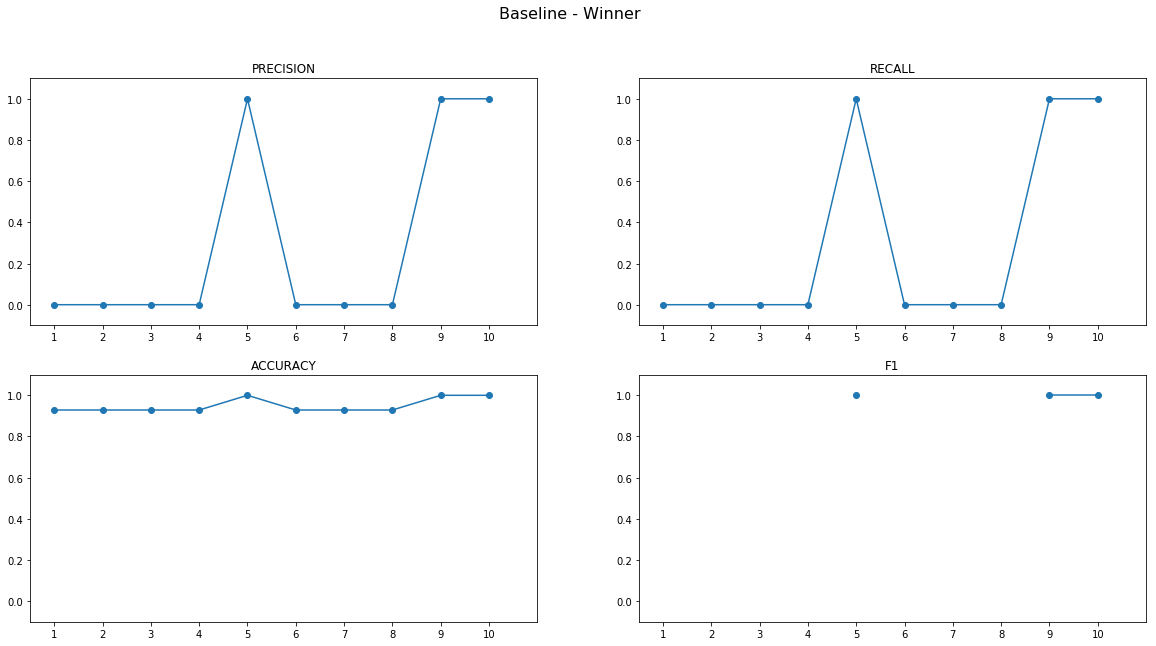

In [205]:
plot_metrics(baselinewinner, 'Baseline - Winner')
# plot_metrics(baselinewinner, 'Baseline - Winner',1)

In [148]:
keep_set['PREDICTED9'] = keep_set['PREDICTED8']
keep_set['PREDICTED10'] = keep_set['PREDICTED8']

In [149]:
top3winner = metric_calc(keep_set, 1)
top3winner

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in long_scalars


,Metric,Week,Value
ACCURACY_1,ACCURACY,1,0.000000
PRECISION_1,PRECISION,1,0.000000
RECALL_1,RECALL,1,NaN
F1_1,F1,1,NaN
ACCURACY_2,ACCURACY,2,0.000000
PRECISION_2,PRECISION,2,0.000000
RECALL_2,RECALL,2,NaN
F1_2,F1,2,NaN
ACCURACY_3,ACCURACY,3,0.000000
PRECISION_3,PRECISION,3,0.000000


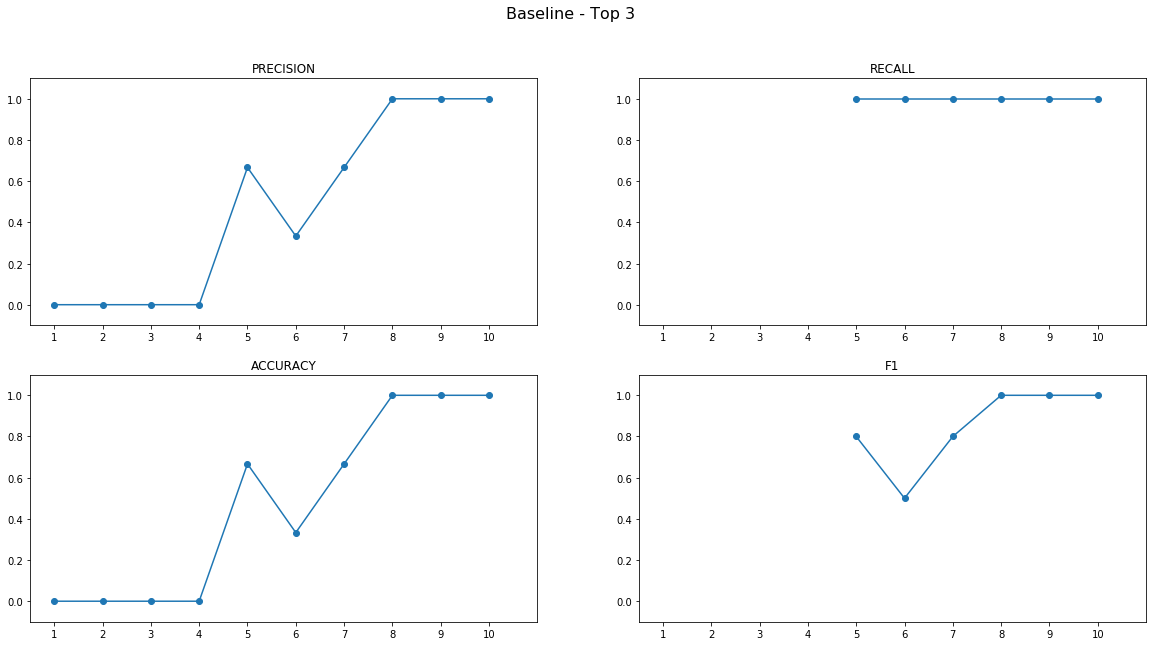

In [206]:
plot_metrics(top3winner, 'Baseline - Top 3')
# plot_metrics(top3winner, 'Baseline - Top 3',1)

# Archived Code

In [ ]:
elim_data = pd.read_csv('bachelorette_538.csv')
elim_data.head()

In [ ]:
elim_data = pd.read_csv('bachelorette_538.csv')
# remove first line, which is just the header info repeated
elim_data = elim_data.drop([0])

# need to change from wide form data to long form data
# want it to be:
# SHOW, SEASON, CONTESTANT, 'TYPE', 'VALUE'
# with 'TYPE' as the current column names
elim1 = pd.melt(elim_data, id_vars=['SHOW', 'SEASON', 'CONTESTANT'])

# rename variable and value
elim1.columns = ['SHOW', 'SEASON', 'CONTESTANT', 'TYPE', 'VALUE']

# split TYPE variable
elim1[['ELIM_DATE', 'NUMBER']] = elim1['TYPE'].str.split('-',expand=True)

#convert NUMBER to numeric
pd.to_numeric(elim1['NUMBER'])
elim1

In [ ]:
elim1.columns

In [ ]:
elim1.VALUE.unique()

In [ ]:
elim1[(elim1.VALUE == 'W') & (elim1.SHOW == 'Bachelorette')]

In [ ]:
elim1[(elim1.SEASON == '12') & (elim1.SHOW == 'Bachelor')]

In [ ]:
ette13 = elim1[(elim1.SEASON == '13') & (elim1.SHOW == 'Bachelorette')]
ette13.head(31)

In [102]:
randbaseline(ette14['NAME'])

'Jordan Kimball'

In [105]:
randbaseline_top3(ette14['NAME'])

('Leo Dottavio', 'Trent Jespersen', 'Clay Harbor')

In [ ]:
sub = elim1[(elim1.SEASON == '14') & (elim1.SHOW == 'Bachelorette')]

In [ ]:
w1_cont = pd.unique(sub.CONTESTANT) #select list of starting contestants
w1_cont = [name for name in w1_cont if str(name) != 'nan'] #remove nan

In [ ]:
elimrounds = sub.NUMBER.max()
elimdict = {}
contlist = w1_cont
elimdict[1] = contlist
    #loops through each elimination week and creates a dict of the updated contestant lists
for week in range(1,int(elimrounds)+1): 
    elimdict[week+1] = getcont(str(week),contlist,sub)
    contlist = elimdict[week+1]

In [ ]:
pred_winner_dict = {}
keylist = []
for key in elimdict.keys():
    keylist.append(key)
for week in keylist[0:7]:
#     print(week)
    pred_winner_dict[week] = randbaseline_top3(elimdict[week])

In [ ]:
pred_winner_dict

In [ ]:
top3_14 = ['14_GARRETT_Y','14_BLAKE_H','14_JASON_T']

In [ ]:
#function returns the updated contestant list after elimination occurs
def getcont(week,cont_list,data):
    numelim = 'ELIMINATION-' + week
    elim = data[(data.TYPE == numelim) & ((data.VALUE == 'E')|(data.VALUE == 'EU')|(data.VALUE == 'ED')|
       (data.VALUE == 'EF'))].CONTESTANT.values
    new_cont_list = cont_list.copy()
    new_cont_list = [elem for elem in new_cont_list if elem not in elim ]
    return new_cont_list
    
    

In [ ]:
#*****add in option bach/ette option
#input season, data
def baselinemodel(season_num, show, data): #data == elim1
    if show == "Bachelor":
        subset = data[(data.SEASON == str(season_num)) & (data.SHOW == 'Bachelor')]
        if season_num == '11':
            return (0,0,0)
    elif show == "Bachelorette":
        subset = data[(data.SEASON == str(season_num)) & (data.SHOW == 'Bachelorette')]
    else: 
        return ("Not a Show Option")
    elimrounds = subset.NUMBER.max()
    
    w1_cont = pd.unique(subset.CONTESTANT) #select list of starting contestants
    w1_cont = [name for name in w1_cont if str(name) != 'nan'] #remove nan
    w1_cont_ID = {} #dictionary that contains numerical ID for contestants
    ID = 0
    for name in w1_cont:
        w1_cont_ID[name] = ID
        ID += 1
    
    winner = subset[subset.VALUE == 'W'].CONTESTANT.values
    winner_lst =[]
    for win in winner:
        break
    winner_lst = [w1_cont_ID[win]] * (int(elimrounds)+1)
    
    elimdict = {}
    contlist = w1_cont
    elimdict[1] = contlist
    #loops through each elimination week and creates a dict of the updated contestant lists
    for week in range(1,int(elimrounds)+1): 
        elimdict[week+1] = getcont(str(week),contlist,subset)
        contlist = elimdict[week+1]
        
    pred_winner_dict = {}
    for key in elimdict.keys():
        pred_winner_dict[key] = randbaseline(elimdict[key])
        
    pred_winner = []
    for key in pred_winner_dict.keys():
        pred_winner.append(w1_cont_ID[pred_winner_dict[key]])
        
    F1score = f1_score(winner_lst, pred_winner, average='micro')
    
    return (pred_winner_dict, winner, F1score)
    
    
    
#return predicted winner for each week, winner, f1score

In [ ]:
baselinemodel(14,'Bachelorette',elim1)

In [ ]:
scoredict_ette = {}
# seasonlist_ette = ['01', '02','03','04','05','06','07','08','09','10','11','12','13']
seasonlist_ette = ['08','09','10','11','12','13','14']
i=1
for season in seasonlist_ette:
    scoredict_ette[i] = baselinemodel(season,'Bachelorette',elim1)
    i+=1
len(scoredict_ette)

In [ ]:
scoredict_bach = {}
seasonlist_bach = ['01', '02','03','04','05','06','07','08','09','10','11','12','13',
                   '14','15','16','17','18','19','20','21']
i=1
for season in seasonlist_bach:
    scoredict_bach[i] = baselinemodel(season,'Bachelor',elim1)
    i+=1
len(scoredict_bach)

In [ ]:
# for key in scoredict_ette.keys():
#     print(key,scoredict_ette[key][2])
ettescore = pd.DataFrame.from_dict(scoredict_ette, orient = "index")
ettescore.columns = ['predictions','seasonwinner','F1Score']
ettescore.head()

In [ ]:
# for key in scoredict_bach.keys():
#     print(key,scoredict_bach[key][2])
bachscore = pd.DataFrame.from_dict(scoredict_bach, orient = "index")
bachscore.columns = ['predictions','seasonwinner','F1Score']
bachscore.head()

In [ ]:
import seaborn as sns

In [ ]:
bachscore.index

In [ ]:
bachscore.F1score

In [ ]:
sns.barplot(x=bachscore.index, y=bachscore.F1Score)

In [ ]:
sns.barplot(x=ettescore.index, y=ettescore.F1Score)

In [ ]:
scoredict_ette[1][2]

In [ ]:
baselinemodel(11,elim1)